In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_table('LAMOST.csv',delimiter=',')

In [29]:
df.columns


Index(['RAJ2000', 'DEJ2000', 'Teff', 'e_Teff', 'q_Teff', 'logg', 'e_logg',
       'q_logg', 'Vt', 'e_Vt', 'q_Vt', '[Fe/H]', 'e_[Fe/H]', 'q_[Fe/H]',
       '[C/Fe]', 'q_[C/Fe]', '[N/Fe]', 'q_[N/Fe]', '[O/Fe]', 'q_[O/Fe]',
       '[Na/Fe]', 'q_[Na/Fe]', '[Mg/Fe]', 'q_[Mg/Fe]', '[Al/Fe]', 'q_[Al/Fe]',
       '[Si/Fe]', 'q_[Si/Fe]', '[Ca/Fe]', 'q_[Ca/Fe]', '[Ti/Fe]', 'q_[Ti/Fe]',
       '[Cr/Fe]', 'q_[Cr/Fe]', '[Mn/Fe]', 'q_[Mn/Fe]', '[Co/Fe]', 'q_[Co/Fe]',
       '[Ni/Fe]', 'q_[Ni/Fe]', '[Cu/Fe]', 'q_[Cu/Fe]', '[Ba/Fe]', 'q_[Ba/Fe]',
       'Mult', 'SubClass'],
      dtype='object')

In [13]:
kepler=pd.read_pickle('KinageAllKepler.pkl')
kepler

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,Prot_err,Prot_new,kepid_x,kepid_y,X,Y,z,R,Lz_est,kin_age_Sharma2020
0,892675,1.038,0.066,-0.076,5929.4,108.9,-108.1,4.385,0.035,-0.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892718,0.782,0.040,-0.046,5000.9,97.3,-90.3,4.570,0.028,-0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,892832,0.784,0.040,-0.045,4975.7,97.1,-88.2,4.564,0.028,-0.034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,892834,0.751,0.034,-0.039,4823.2,90.4,-82.2,4.587,0.023,-0.028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,893033,0.685,0.027,-0.030,4707.6,87.6,-82.5,4.636,0.018,-0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56950,12784183,0.544,0.012,-0.013,3844.2,80.0,-72.9,4.688,0.013,-0.012,...,0.104,18.124777,12784183.0,12784183.0,0.018169,-0.154255,0.047623,8.183285,287.403694,-0.088600
56952,12785321,0.835,0.035,-0.041,4962.2,83.2,-78.8,4.564,0.022,-0.033,...,0.251,33.048234,12785321.0,12785321.0,0.082690,-0.712343,0.214503,8.148507,332.273040,0.017596
56954,12834265,0.685,0.026,-0.022,4356.2,73.4,-68.6,4.613,0.021,-0.018,...,0.042,21.323459,12834265.0,12834265.0,0.048083,-0.413760,0.127588,8.162410,94.361383,1.505106
56955,12884404,1.051,0.062,-0.075,5945.6,127.8,-149.6,4.400,0.036,-0.045,...,1.876,14.959591,12884404.0,12884404.0,0.155333,-1.353919,0.421869,8.157804,218.082184,0.336984


In [10]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
c1 = SkyCoord([i*u.deg for i in df['RAJ2000']], [i*u.deg for i in df['DEJ2000']], frame='icrs')
c2 = SkyCoord([i*u.deg for i in kepler['ra']], [i*u.deg for i in kepler['dec']], frame='icrs')


In [23]:
from tqdm import trange

In [52]:
idx_sdss, d2d_sdss, d3d_sdss = c2.match_to_catalog_sky(c1)


In [56]:
idx=idx_sdss[d2d_sdss<1*u.arcsec]
d2d=d2d_sdss[d2d_sdss<1*u.arcsec]

(array([6607., 4006., 1354.,  592.,  316.,    0.,    0.,    0.,    0.,
           0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1 Patch objects>)

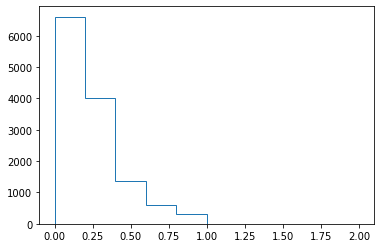

In [57]:
plt.hist(d2d.arcsec, histtype='step', range=(0,2))

In [61]:
kepler_LAMOST=kepler[d2d_sdss<1*u.arcsec]

In [79]:
for i in df.columns:
    kepler_LAMOST[i]=df.iloc[idx][i].values

/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
kepler_LAMOST.to_pickle('Kepler_LAMOST.pkl')